In [ ]:
'''
Project: Customer Segmentation Analysis

Objective: Perform customer segmentation analysis using transactional data to identify distinct 
customer groups and their characteristics.

Steps to Follow:

1.Data Acquisition: Obtain the transactional data containing customer information, 
such as purchase history, demographics, and other relevant attributes.

2.Data Preprocessing: Use pandas to load and preprocess the data. Perform the following tasks:

a.Handle missing data: Identify missing values and apply appropriate techniques such as imputation 
or deletion.
b.Data cleaning: Remove duplicates, outliers, and irrelevant columns.
c.Feature engineering: Create new features if needed, such as calculating 
the total purchase amount or frequency of transactions.
d.Data Analysis: Use NumPy and pandas to analyze the data and gain insights.
Perform the following tasks:

3.Descriptive statistics: Calculate summary statistics like mean, median, and standard deviation.
a.Customer segmentation: Apply clustering algorithms (e.g., K-means) to group customers 
b.based on their attributes and behavior.
c.Feature selection: Identify key features that contribute to customer segmentation.

4.Data Visualization: Use Matplotlib to create visualizations and plots to better understand 
the data. Perform the following tasks:
a.Scatter plots: Visualize customer segments by plotting relevant attributes against each other.
b.Bar plots: Show the distribution of customers across different segments.
c.Heatmaps: Display correlations between customer attributes and identify significant patterns.

5.Insights and Recommendations: Document and interpret the results of the customer segmentation 
analysis. Provide insights into different customer segments, their characteristics, 
and their purchasing behavior. Based on these insights, suggest personalized marketing strategies 
or targeted campaigns for each segment.

6.Presentation: Create a presentation or report summarizing the project, 
including data preprocessing steps, analysis techniques, visualizations, and key findings. 
Clearly communicate the value of customer segmentation for business decision-making.

Remember, customer segmentation analysis is a vast topic, and you can adapt and 
expand on the project based on your specific dataset and objectives. Feel free to incorporate 
additional techniques, such as dimensionality reduction or different clustering algorithms, 
to enhance your analysis.
'''

In [1]:
filename = "customer_data.csv"

# Open the CSV file in write mode
with open(filename, 'w') as file:
    pass

print("CSV file emptied successfully.")


CSV file emptied successfully.


In [2]:
import pandas as pd
import numpy as np

# # Generate random data for 30 customers
# np.random.seed(42)

# customer_ids = range(1, 31)
# ages = np.random.randint(18, 65, size=30)
# incomes = np.random.randint(20000, 100000, size=30)
# purchase_amounts = np.random.randint(50, 500, size=30)

# # Create a DataFrame with the customer data
# data = pd.DataFrame({
#     "CustomerID": customer_ids,
#     "Age": ages,
#     "Income": incomes,
#     "PurchaseAmount": purchase_amounts
# })

# # Save the DataFrame to a CSV file
# data.to_csv("customer_data.csv", index=False)


import pandas as pd
import numpy as np
from faker import Faker

# Generate random data for 30 customers
fake = Faker()

customer_ids = range(1, 31)
names = [fake.name() for _ in customer_ids]
ages = np.random.randint(18, 65, size=30)
incomes = np.random.randint(20000, 100000, size=30)
purchase_amounts = np.random.randint(50, 500, size=30)

# Create a DataFrame with the customer data
data = pd.DataFrame({
    "CustomerID": customer_ids,
    "Name": names,
    "Age": ages,
    "Income": incomes,
    "PurchaseAmount": purchase_amounts
})

# Save the DataFrame to a CSV file
data.to_csv("customer_data.csv", index=False)

print("CSV file created successfully.")


CSV file created successfully.


In [7]:
a=pd.read_csv('customer_data.csv')
print(a)

    CustomerID                Name  Age  Income  PurchaseAmount
0            1       Shannon Duran   62   72256             490
1            2         Erin Brandt   58   55222             183
2            3        Sara Hawkins   46   97373             333
3            4        Martin Davis   32   99575              77
4            5    Rebecca Williams   62   83335             157
5            6         Todd Turner   18   30965              93
6            7      Angela Johnson   42   44538             389
7            8      Kristen Parker   24   90592             335
8            9    Carrie Hernandez   26   28110             495
9           10  Ms. Elizabeth Ward   41   99309             380
10          11      Alexander Best   18   47266             177
11          12       Matthew Green   61   72992             397
12          13       Robert Wright   25   26910             280
13          14    Breanna Roberson   41   20206             239
14          15        Anthony Cook   28 

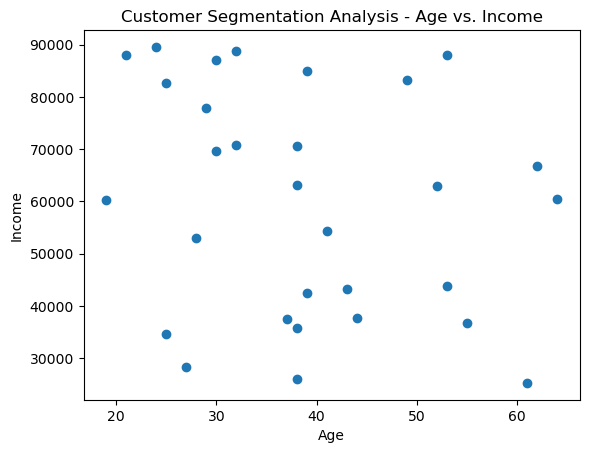

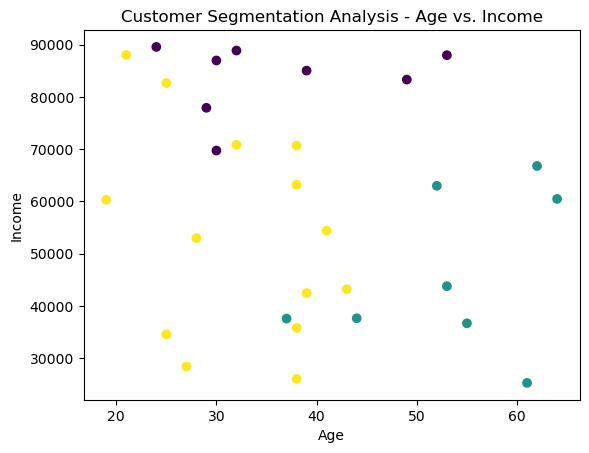

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Data Acquisition
data = pd.read_csv("customer_data.csv")

# Step 2: Data Preprocessing
data = data.dropna()
data = data.drop_duplicates()
data = data.drop(["CustomerID"], axis=1)

# Step 3: Data Analysis
selected_features = ["Age", "Income", "PurchaseAmount"]
segmentation_data = data[selected_features]

# Step 4: Data Visualization
plt.scatter(segmentation_data["Age"], segmentation_data["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Segmentation Analysis - Age vs. Income")
plt.show()

# Step 5: Apply Clustering Algorithm
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(segmentation_data_scaled)
segment_labels = kmeans.labels_

# Step 6: Visualize Clusters
plt.scatter(segmentation_data["Age"], segmentation_data["Income"], c=segment_labels)
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Segmentation Analysis - Age vs. Income")
plt.show()




In [4]:
# Step 7: Insights and Recommendations
# Analyze the clusters and interpret the results

# Assign the cluster labels to the original data
data["Cluster"] = segment_labels

# Calculate the mean values of each feature for each cluster
cluster_means = data.groupby("Cluster").mean()

# Print the cluster means
print(cluster_means)

# Generate insights based on the cluster means and identify characteristics of each segment

# Step 8: Presentation
# Create a presentation or report summarizing the project and findings

# Example: Save the analysis and insights to a CSV file
cluster_means.to_csv("customer_segmentation_analysis.csv")


               Age     Income  PurchaseAmount
Cluster                                      
0        35.750000  83675.875      176.000000
1        53.500000  46411.500      200.625000
2        32.285714  53838.500      407.785714
